Types of fungi: Yeasts, molds, mushrooms

Model parameters: hyphal extension rate (growth rate), density of hyphae in given volume, moisture conditions
Higher growth rate → faster decomposition
Denser filaments → slower decomposition
More adapted to moisture → slower decomposition

All in one state - middle of decay cycle, assume information from this is consistent to other stages

Assumptions:
- Assume all ground litter are twigs and bark and that their composition and densitys are identical
- Assume that there are only 3 types of fungi; yeasts, molds and mushrooms (consider different hyphal density)
- Assume that when there are different types of fungi present, there are equal areas of each fungus
- Assume that environments include arid, semi-arid, temperate, arboreal, and tropical rain forests
- Assume that the rate at which decomposition changes according to density is consistent among different types of fungi
- Assume that no matter the combination of fungi, there will always be 
- Assume this process occurs over 182 days with time step = 1 day
- Assume that yeasts have the highest growth rate, molds have the second highest and mushrooms grow the slowest
- Assume that the death rate per day of mushrooms is 0.2, death rate per day of yeast is 0.1 death rate per day of mold is 0.3
- Assume that when yeasts and molds are together, the growth rate of these fungi increases; when molds and mushrooms are together, the growth rate of these fungi decreases; when mushrooms and yeasts are together...*insert*
- Assume that the level of moisture is on a scale from 0 to 1; 0 = arid, semi-arid = 0.25, temperate = 0.5. arboreal = 0.75, rainforest = 1
- Assume that moisture accelerates wood decomposition
- Assume that if a fungus is more adapted to moisture, decomposition is slowed down
- Assume that mushrooms are well adapted to moisture, yeast is less adapted to moisture and molds are least adapted to moisture
- Assume that if there are multiple types of fungi in the given environment, the measure of their ability to adapt to moisture is the average among the individual fungi's ability to adapt
- Assume that if a natural disaster occurs, it only lasts one day
- Assume that there is a 5% chance a sandstorm will happen within an arid environment; if a sandstorm occurs, it increases the growth rate of fungi by 0.02
- Assume that there is a 10% chance of a landslide in a semi-arid environment; if a sandstorm occurs, it increases the growth rate of fungi by 0.005
- Assume that there is a 1.5% chance a hurricane will happen within an temperate environment; if a hurricane occurs, it decreases the growth rate of fungi by 0.03
- Assume that there is a 8% chance of a wild fire in a arboreal environment; if a wildfire occurs, it decreases the growth rate of fungi by 0.01
- Assume that there is a 15% chance of a storm happening in a rainforest environment; if a storm occurs, it decreases the growth rate of fungi by 0.015

Add additional assumptions

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [117]:
def natural_disaster(env):
    if env == "arid":
        # incorporate chance of sandstorm - affect growth rate
        if np.random.uniform(0, 1) < 0.05:
            dist_sand = True
            add_to_growth = 0.02
        else:
            add_to_growth = 0
    elif env == "semi-arid":
        # incorporate chance of landslide - affect growth rate
        if np.random.uniform(0, 1) < 0.10:
            dist_slide = True
            add_to_growth = 0.005
        else:
            add_to_growth = 0
    elif env == "temperate":
        # incorporate chance of hurricane
        if np.random.uniform(0, 1) < 0.12:
            dist_hurricane = True
            add_to_growth = -0.03
        else:
            add_to_growth = 0
    elif env == "arboreal":
        # incorporate chance of wild fire
        if np.random.uniform(0, 1) < 0.08:
            dist_wildfire = True
            add_to_growth = -0.01
        else:
            add_to_growth = 0
    elif env == "rainforest":
        # incorporate chance of storm
        if np.random.uniform(0, 1) < 0.15:
            dist_storm = True
            add_to_growth = -0.015
        else:
            add_to_growth = 0
    
    return add_to_growth
            

In [118]:
def fungi_model(vol, fType, env, filDensityYeast = 1.1, filDensityMold = 0.985, filDensityMushroom = 0.857): # volume of wood, fungi type(s), environment
    # increase growth rate: 100 - 1.5*decomprate (just an example)
    # denser filaments: 100 - 0.7*decomprate (just an example)
    # more moisture: 100 - 0.5*decomprate (just an exmample)
    
    # set moisture level according to environment: 1 = most moist, 0 = least moist
    if env == "arid":
        moistLevel = 0
    elif env == "semi-arid":
        moistLevel = 0.25
    elif env == "temperate":
        moistLevel = 0.5
    elif env == "arboreal":
        moistLevel = 0.75
    elif env == "rainforest":
        moistLevel = 1
    
    # measure of how well adapted fungi is to moisture (scale from 0 to 1)
    # higher = more adapted to moisture (slower decomp), lower = less adapted to moisture (faster decomp)
    moistAdaptYeast = 0.8
    moistAdaptMold = 0.5
    moistAdaptMushroom = 0.2
    
    filDensityMold = (filDensityMold/5) + 1 
    filDensityMushroom = (filDensityMushroom/5) + 1
    filDensityYeast = (filDensityYeast/5) + 1
    
    # set growth, death rate and moisture level according to type(s) of fungi
    if "yeasts" in fType and "molds" in fType and "mushrooms" in fType:
        gRate = 0.5
        dRate = 0.3
        moist_fungi = (moistAdaptYeast + moistAdaptMold + moistAdaptMushroom)/3
        density_level = (filDensityYeast + filDensityMold + filDensityMushroom)/3
        
    elif "yeasts" in fType and "molds" in fType:
        gRate = 0.8
        dRate = 0.4
        moist_fungi = (moistAdaptYeast + moistAdaptMold)/2
        density_level = (filDensityYeast + filDensityMold)/2
        
    elif "molds" in fType and "mushrooms" in fType:
        gRate = 0.2
        dRate = 0.05
        moist_fungi = (moistAdaptMold + moistAdaptMushroom)/2
        density_level = (filDensityMold + filDensityMushroom)/2
        
    elif "yeasts" in fType and "mushrooms" in fType:
        gRate = 0.4
        dRate = 0.3
        moist_fungi = (moistAdaptYeast + moistAdaptMushroom)/2
        density_level = (filDensityYeast + filDensityMushroom)/2
        
    elif "yeasts" in fType and len(fType) == 1:
        gRate = 0.6
        dRate = 0.1
        moist_fungi = moistAdaptYeast
        density_level = filDensityYeast
        
    elif "molds" in fType and len(fType) == 1:
        gRate = 0.25
        dRate = 0.1
        moist_fungi = moistAdaptMold
        density_level = filDensityMold
        
    elif "mushrooms" in fType and len(fType) == 1:
        gRate = 0.08
        dRate = 0.05
        moist_fungi = moistAdaptMushroom
        density_level = filDensityMushroom
        
    
    # growth rate depends on type of fungi
    # moisture depends on environment, how moisture affects wood decomp also depends on type of fungi (how well fungi can adapt to moisture)
    # density of filaments depends on type of fungi
    
    # density of fungi filaments, denser filaments = slower decomposition
    volume_list = []
    vol0 = vol
    for t in range(120):
        
        disaster_add = natural_disaster(env)
        moist_factor = moistLevel - moist_fungi #add assumption for this up top, if fungi isnt adapted to moisture enough = faster decomposition
        
        if moist_factor <= 0: 
            moist_factor = 0
        
        decomprate = ((((gRate + disaster_add) - dRate)*(1+moist_factor)))/density_level
        volN = vol0 - decomprate*vol0
        
        volume_list.append(volN)
        vol0 = volN
        
    return volume_list
        

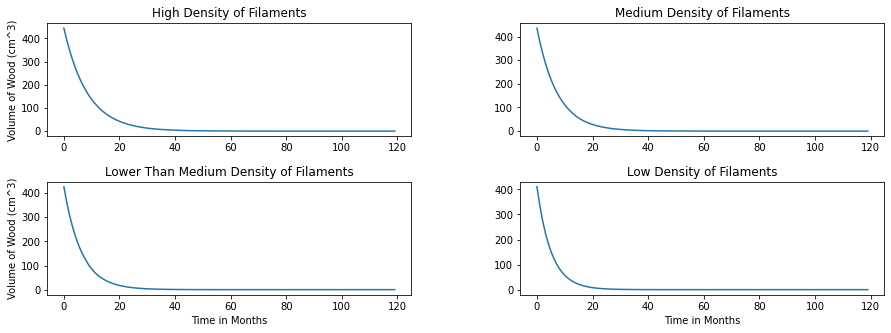

In [119]:
fig, ax = plt.subplots(2, 2, figsize = (15, 5))
y1 = fungi_model(500, ["yeasts", "molds", "mushrooms"], env = "arid", filDensityYeast = 5, filDensityMold = 4, filDensityMushroom = 3)
y2 = fungi_model(500, ["yeasts", "molds", "mushrooms"], env = "arid", filDensityYeast = 3, filDensityMold = 3.5, filDensityMushroom = 2)
y3 = fungi_model(500, ["yeasts", "molds", "mushrooms"], env = "arid", filDensityYeast = 1, filDensityMold = 2, filDensityMushroom = 2.5)
y4 = fungi_model(500, ["yeasts", "molds", "mushrooms"], env = "arid", filDensityYeast = 0.5, filDensityMold = 1, filDensityMushroom = 0.3)
x = np.array(range(0, 120))
ax[0, 0].plot(x, y1)
ax[0, 1].plot(x, y2)
ax[1, 0].plot(x, y3)
ax[1, 1].plot(x, y4)
ax[0, 0].set(ylabel = "Volume of Wood (cm^3)", title = "High Density of Filaments")
ax[0, 1].set(title = "Medium Density of Filaments")
ax[1, 0].set(title = "Lower Than Medium Density of Filaments", xlabel = "Time in Months",ylabel = "Volume of Wood (cm^3)")
ax[1, 1].set(xlabel = "Time in Months", title = "Low Density of Filaments")
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)


### 

In [93]:
12*10

120